# Classing Art Styles

This is a fun data set to test to train a model can learn different art styles!

Please note the following commands were run on an instance through google. The pip install torch_nightly will not install on my mac.

!pip install --upgrade pip
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install fastai --upgrade

In [ ]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install fastai --upgrade

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [39]:
import warnings; warnings.simplefilter('ignore')  
# will throw warning: "Palette images with Transparency expressed in bytes should be converted to RGBA images"

In [40]:
from fastai import *
from fastai.vision import *

Run Each Cell Below to create folders from CSV's of image URLs.

In [ ]:
folder = 'impressionisum'
file = 'Impressionisum.csv'
path = Path('artstyles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=600)
# Will throw errors for files that are two large

In [ ]:
folder = 'realisum'
file = 'Realism.csv'
path = Path('artstyles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=600)

In [ ]:
folder = 'pop_art'
file = 'pop_art.csv'
path = Path('artstyles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=600)

In [ ]:
folder = 'splatter_paint'
file = 'splatter_paint.csv'
path = Path('artstyles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=600)

In [ ]:
folder = 'cubisum'
file = 'cubisum.csv'
path = Path('artstyles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=600)

In [ ]:
folder = 'minimalism'
file = 'Minimalism.csv'
path = Path('artstyles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=600)

Testing Data

In [41]:
path = Path('artstyles')
classes = ['minimalism','cubisum','realisum', 'splatter_paint', 'pop_art', 'impressionisum']

In [42]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

minimalism


cubisum


realisum


splatter_paint


pop_art


impressionisum


In [58]:
np.random.seed(42)
path = Path('artstyles')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

#padding_mode = 'zeros', or padding_mode = 'border', will make data NoneType

In [59]:
type(data)

fastai.vision.data.ImageDataBunch

In [60]:
data.classes

['cubisum',
 'impressionisum',
 'minimalism',
 'pop_art',
 'realisum',
 'splatter_paint']

In [61]:
data.c # number of classes

6

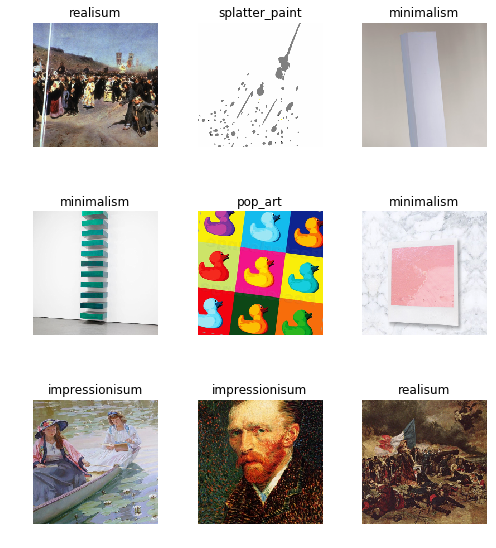

In [64]:
data.show_batch(rows=3, figsize=(7,8))

**Train a Model**

In [65]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [66]:
learn.fit_one_cycle(4)

Total time: 03:00
epoch  train_loss  valid_loss  accuracy
1      1.228264    0.697958    0.712418  (00:43)
2      0.914681    0.677679    0.714052  (00:44)
3      0.718002    0.646829    0.720588  (00:44)
4      0.620908    0.635734    0.720588  (00:46)



In [67]:
learn.save('stage-1')

In [75]:
learn.unfreeze()

In [76]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


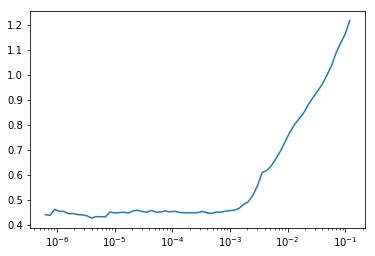

In [77]:
learn.recorder.plot()

In [78]:
1e-4 == 10**-4

True

In [79]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

Total time: 01:29
epoch  train_loss  valid_loss  accuracy
1      0.479063    0.619411    0.722222  (00:44)
2      0.428772    0.636275    0.725490  (00:45)



In [80]:
learn.save('stage-2')

learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-3))

learn.save('stage-3')

**Interpreation**

In [98]:
interp = ClassificationInterpretation.from_learner(learn)

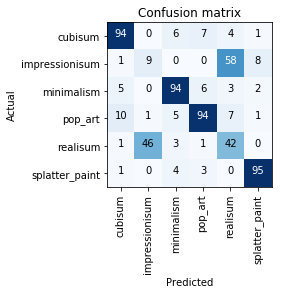

In [99]:
interp.plot_confusion_matrix()

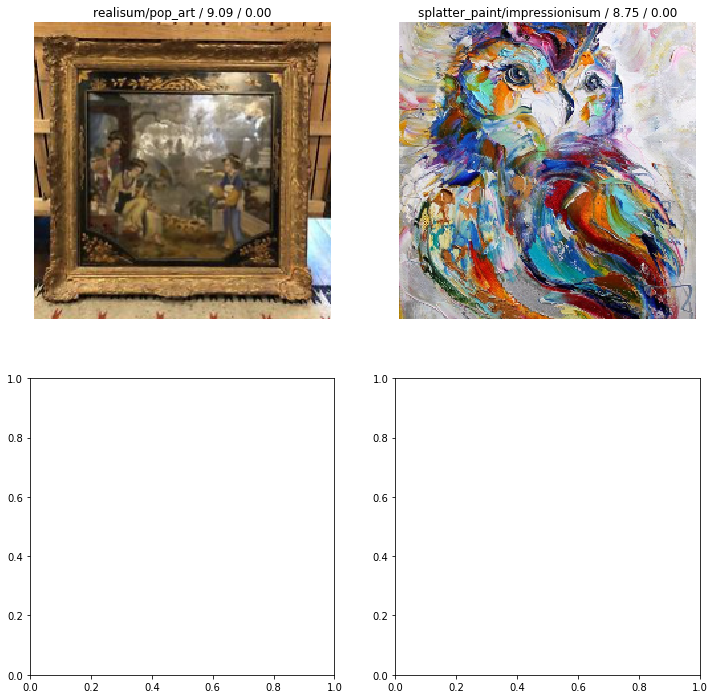

In [100]:
interp.plot_top_losses(2)